#Ejercicio de preparación de datos en Python

<p><strong>Objetivo: </strong> El objetivo de este cuaderno es realizar todos los pasos dentro del proceso de preparación de datos sobre el conjunto de datos de Hotel Booking.</p>

En este módulo se va a trabajar con el conjunto de datos <b>Hotel Booking Demand</b>. El conjunto de datos contiene información sobre reservas de hotel realizadas en dos hoteles, uno en ciudad y otro un resort. Cada fila consiste en una reserva del hotel e incluye información sobre cuando fue realizada, la duración de la estadía, el número de adultos, niños y bebés entre otras cosas.

Este conjunto de datos es ideal para practicar el análisis exploratorio de los datos y los conceptos de limpieza y calidad de los datos.

En el siguiente enlace puede encontrar información sobre el conjunto de datos y la descripción de cada uno de los atributos:
<ul>
  <li>Descripción de los datos: <a href="https://www.kaggle.com/jessemostipak/hotel-booking-demand" target="_blank">https://www.kaggle.com/jessemostipak/hotel-booking-demand</a></li>
  <li>Es importante revisar primero el conjunto de datos y comprender algunos de los atributos</li>
  <li>Tipo de datos: csv</li>
</ul>

## Obtención de datos

En la siguiente línea se importan todas las librerías necesarias para el trabajo con el notebook:

In [0]:
# Instalar Folium si lo requiere

In [0]:
pip install folium

In [0]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

A continuación se importan los datos del CSV que se debe cargar en el Google Drive previamente:

In [0]:
# Leer datos desde archivo CSV
csv_path = "https://www.dropbox.com/s/kxnrtucyke47ge6/hotel_bookings.csv?dl=1"
df = pd.read_csv(csv_path)
# Imprimer las primeras cinco filas de un dataframe para probar que todo ok
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Conociendo los datos

Para comenzar a conocer los datos se pueden utilizar dos métodos que nos ayudan a obtener un vistazo rápido del conjunto de datos, se utiliza el comando <code>dataframe.shape</code> y el comando <code>dataframe.info</code>:

In [0]:
df.shape

Out[4]: (119390, 32)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Identificar los tipos de datos

Se exploran los tipos de datos de cada columna. Identifique si hay alguna que según su significado no coincida con su tipo de datos:

In [0]:
#La función dtypes genera una tabla con el tipo de dato de cada columna
df.dtypes

Out[6]: hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                     

### Identificar datos faltantes

Para identificar los datos faltantes en el conjunto de datos se puede utilizar la función <code>isnull</code> y sumar los valores:

In [0]:
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Identificar datos atípicos

Para identificar datos atípicos se pueden utilizar distintos métodos. Utilicemos un gráfico de box plot para graficar una de las variables:

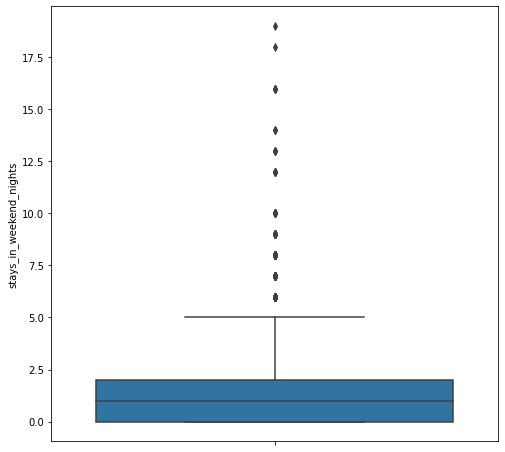

In [0]:
fig = pyplot.figure(figsize=(8,8))
sns.boxplot(y=df["stays_in_weekend_nights"])
pyplot.show()

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
   <strong>AHORA TÚ: </strong>  
  <p>
Seleccione otra variable numérica y pinte su gráfico de Boxplot, identifique si tiene valores atípicos o no.
</p>
</div>

In [0]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar


Tambien se pueden analizar los datos utilizando alguna variable categórica, por ejemplo, las reservas que canceladas o no canceladas, y vicularlo a una variable numérica como las noches de fin de semana:

Out[10]: <AxesSubplot:xlabel='is_canceled', ylabel='stays_in_weekend_nights'>

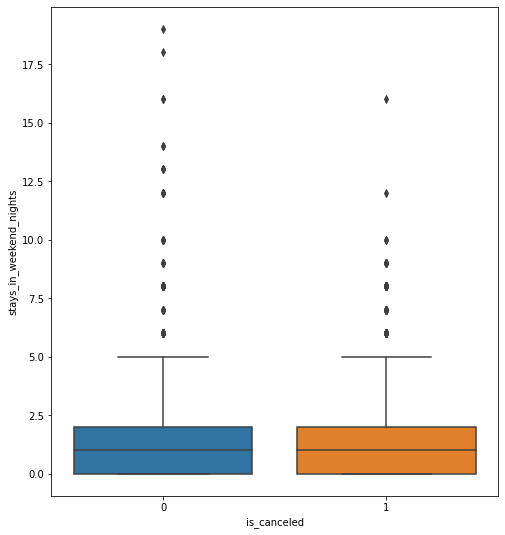

In [0]:
fig = pyplot.figure(figsize=(8,9))
sns.boxplot(x="is_canceled", y="stays_in_weekend_nights", data=df)

### Calcular las estadísticas

<p>Se va a utilizar la función <code>dataframe.describe</code> para visualizar las estadísticas del conjunto de datos: </p>

In [0]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [0]:
df.describe(include=['object'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


### Análisis de tendencia central, posición y dispersión

El análisis de la tendencia central, la simetría y la dispersión de los datos es importante para entender cómo se comporta cada variable:

Out[13]: <function matplotlib.pyplot.show(close=None, block=None)>

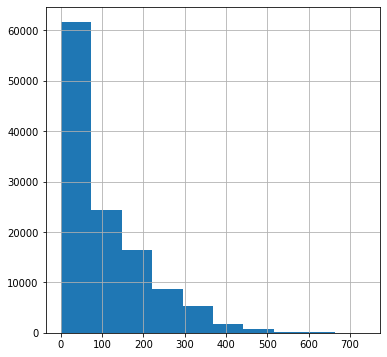

In [0]:
#Variable tiempo de espera (número de días entre hecha la reserva y el día de llegada al hotel)
df['lead_time'].hist(figsize = (6,6))
pyplot.show

In [0]:
mean = df['lead_time'].mean()
median = df['lead_time'].median()
mode = df['lead_time'].mode()
skew = df['lead_time'].skew()
kurt = df['lead_time'].kurt()
print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 104.01141636652986
La mediana es: 69.0
La moda es: 0    0
dtype: int64
El sesgo es: 1.3465498727254268
La kurtosis es: 1.6964488485585467


Out[15]: <function matplotlib.pyplot.show(close=None, block=None)>

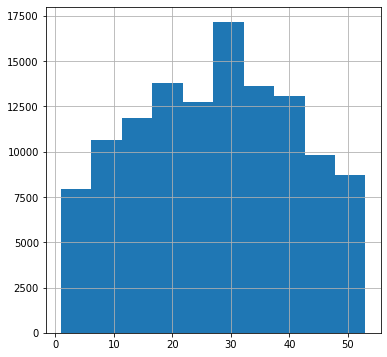

In [0]:
#Variable número de semana de llegada (la semana del año en la que llega el cliente)
df['arrival_date_week_number'].hist(figsize = (6,6))
pyplot.show

In [0]:
mean = df['arrival_date_week_number'].mean()
median = df['arrival_date_week_number'].median()
mode = df['arrival_date_week_number'].mode()
skew = df['arrival_date_week_number'].skew()
kurt = df['arrival_date_week_number'].kurt()
print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 27.16517296255968
La mediana es: 28.0
La moda es: 0    33
dtype: int64
El sesgo es: -0.010014326041540811
La kurtosis es: -0.9860771763295451


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
   <strong>AHORA TÚ: </strong>  
  <p>
Seleccione otra variable y analice su comportamiento
</p>
</div>

In [0]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar


### Contando datos duplicados

Para ver los datos duplicados de todo el dataframe, simplemente llame al método <code>duplicated()</code>en el DataFrame. Si luego se llama al método SUM, se tendrá el total de duplicados:

In [0]:
#Contando los duplicados de todo el dataframe
df.duplicated().sum()

Out[18]: 31994

## Exploración y visualización de los datos

Utilizando técnicas de visualización se puede comenzar a comprender el contexto alrededor de los datos. Se van a realizar diferentes preguntas capaces de brindar información interesante. Estas preguntas nos ayudan a encontrar análisis significativos sin siquiera aplicar alguna técnica de analítica. Se comprende mejor el mundo de las reservas de hoteles, así como las necesidades que les pueden surgir a las empresas y que se tratan de solucionar con herramientas analíticas.

### Análisis de variables numéricas

Primero se exploran las variables numéricas, y observamos su distribución. Se puede utilizar el diagrama de hist para visualizar todos los histogramas de las variables numéricas dentro del dataframe:

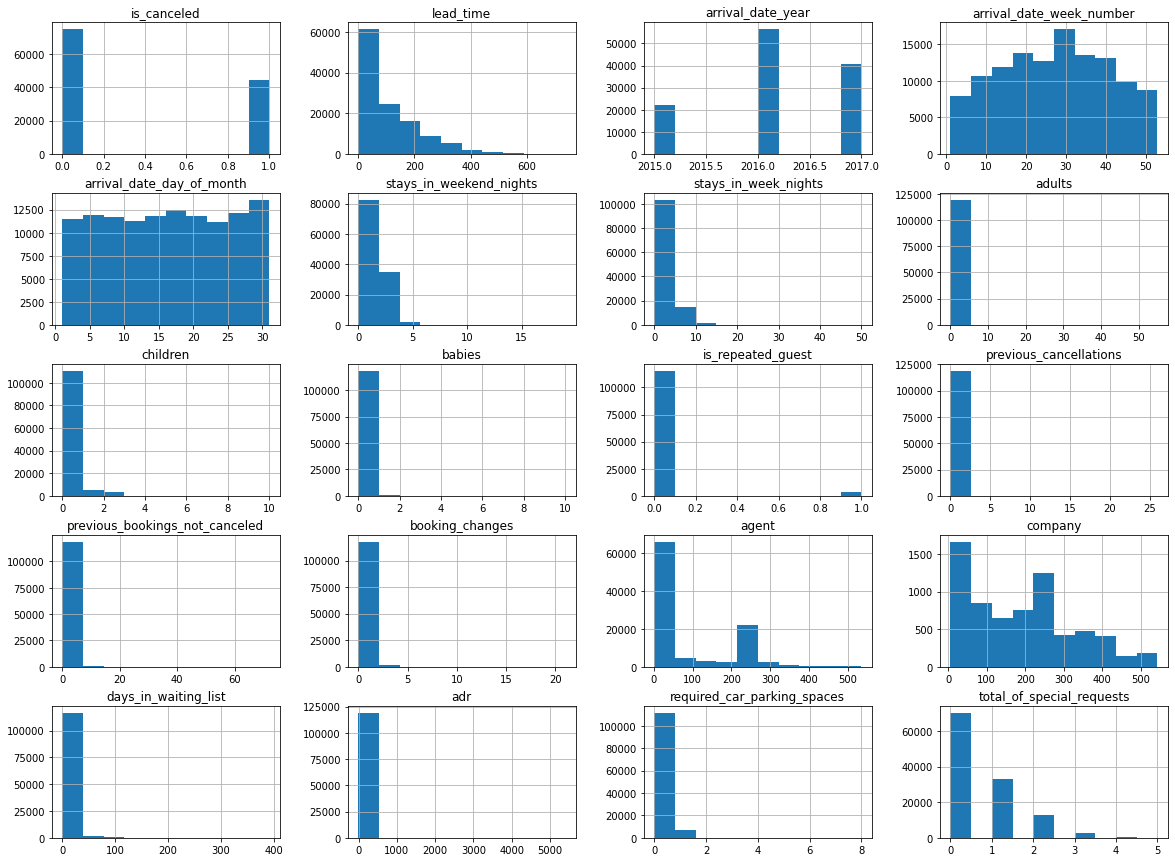

In [0]:
df.hist(figsize=(20,15));

Tambien se puede analizar cada variable de manera independiente. En este gráfico se muestra el historigrama de la variable <b>arrival_date_week_number</b> que muestra las diferentes semanas del año 1 - 52 donde los clientes reservan o se hospendan en los hoteles:

Out[20]: <function matplotlib.pyplot.show(close=None, block=None)>

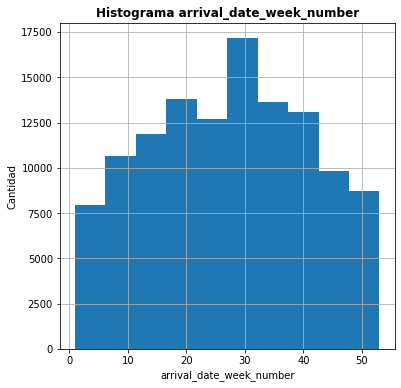

In [0]:
df['arrival_date_week_number'].hist(figsize = (6,6))
pyplot.xlabel('arrival_date_week_number')
pyplot.ylabel('Cantidad')  
pyplot.title('Histograma arrival_date_week_number', fontweight ="bold")
pyplot.show

En este otro histograma se aprecia la distribución de la variable <b>adr</b> que significa la tarifa diaria promedio:

Out[21]: <function matplotlib.pyplot.show(close=None, block=None)>

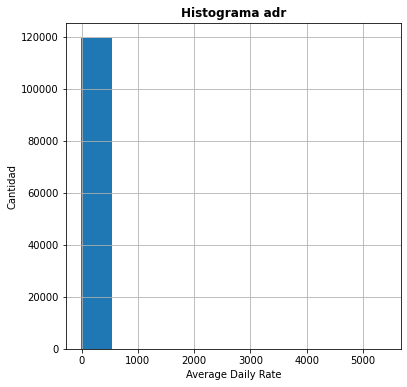

In [0]:
df['adr'].hist(figsize = (6,6))
pyplot.xlabel('Average Daily Rate')
pyplot.ylabel('Cantidad')  
pyplot.title('Histograma adr', fontweight ="bold")
pyplot.show

Para visualizar la relación entre dos variables numéricas se utiliza un gráfico de líneas. Este combina las variables de mes de llegada y tarifa promedio. Como tenemos variables que representan tiempo (años, meses, semanas, fecha) se puede realizar un análisis en el tiempo para ver su comportamiento. La temporada alta es Junio, Julio y Agosto y la temporada baja es Noviembre, Diciembre, Enero:

Out[22]: <AxesSubplot:xlabel='arrival_date_month', ylabel='adr'>

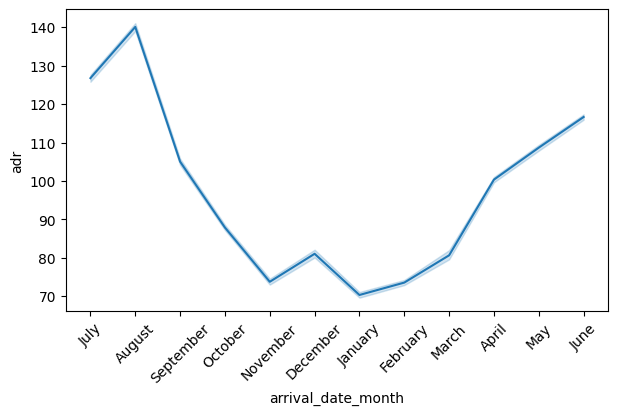

In [0]:
fig = pyplot.figure(figsize=(7,4),dpi=100)
pyplot.xticks(rotation=45,fontsize=10);
sns.lineplot(data=df, x= 'arrival_date_month', y = 'adr')

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
   <strong>AHORA TÚ: </strong>  
  <p>
Ahora analiza el comportamiento de la variable <b>adr</b> pero con respecto a las semanas del año, ¿coincide con el gráfico anterior?
</p>
</div>

In [0]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar


Haga doble clic <b>aquí</b> para ver la solución.

<!-- Respuesta:

fig = plt.figure(figsize=(10,5),dpi=100)
sns.lineplot(data=df, x= 'arrival_date_week_number', y = 'adr')
plt.xticks(rotation=45,fontsize=10);

-->

### Análisis de variables categóricas

Para analizar las variables categóricas, seleccione primero el subconjunto del dataframe y visualice  los valores de cada categoría. Identifique algún valor que no corresponda con el negocio:

In [0]:
# Seleccionar las variables categóricas
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


Visualizar los valores de cada una de las variables:

In [0]:
for col in df_cat.columns:
    print(f"{col}: \n{df_cat[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

arrival_date_month: 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA

Ahora, utilizando gráficos, se observa la proporción entre las distintas categorías:

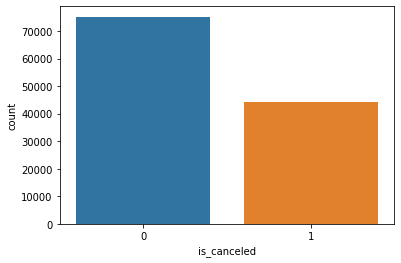

In [0]:
# Variable si la reserva fue cancelada o no
sns.countplot(data=df, x = 'is_canceled')
pyplot.show()

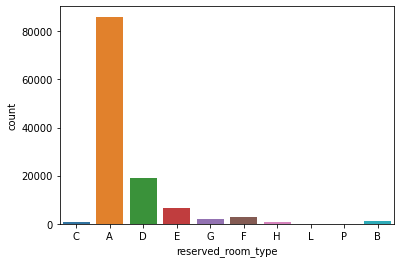

In [0]:
# Inclinación de los clientes por los distintos tipos de habitación
sns.countplot(data=df, x = 'reserved_room_type')
pyplot.show()

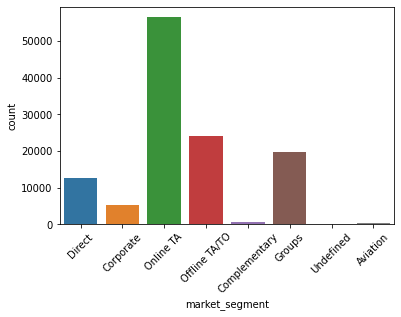

In [0]:
# Por dónde ser realizaron las reservas
sns.countplot(data=df, x= 'market_segment')
pyplot.xticks(rotation=45,fontsize=10);

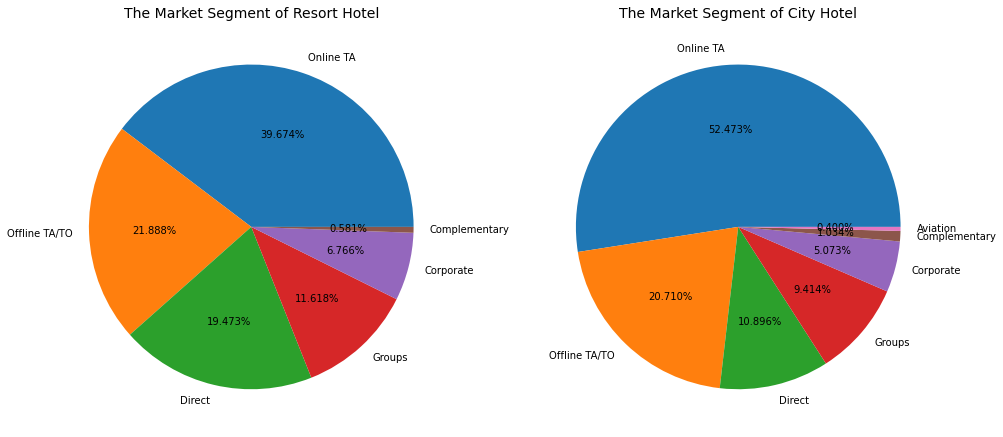

In [0]:
# Análisis de las reservas según el segmento del mercado

# Separamos los grupos por tipo de hotel y con solo las reservas no canceladas
rh = pd.DataFrame(df.loc[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)])
ch = pd.DataFrame(df.loc[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)])

# Ajuste tamaño de la figura
fig = pyplot.figure(figsize = (16, 9))

#Pie de Resort Hotel
ax = fig.add_subplot(121)
rh_segment_pie = pd.DataFrame(rh['market_segment'].value_counts())
ax.set_title('The Market Segment of Resort Hotel', fontsize = 14)
ax = pyplot.pie(x = rh_segment_pie['market_segment'], labels = rh_segment_pie.index, autopct = '%.3f%%')

#Pie de City Hotel
ax = fig.add_subplot(122)
ch_segment_pie = pd.DataFrame(ch['market_segment'].value_counts())
ax.set_title('The Market Segment of City Hotel', fontsize = 14)
ax = pyplot.pie(x = ch_segment_pie['market_segment'], labels = ch_segment_pie.index, autopct = '%.3f%%')

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
   <strong>AHORA TÚ: </strong>  
  <p>
Visualiza la cantidad de Reservas asociadas al tipo de hotel, si es Resort o City, ¿Qué tipo de hotel tiene más reservas?
</p>
</div>

In [0]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar


Haga doble clic <b>aquí</b> para ver la solución.

<!-- Respuesta:

sns.countplot(data=df, x = 'hotel')

Como podemos observar, hay casi el doble de reservas para el City Hotel que pare el Resort.

-->

### Combinando variables

Después de analizar las variables de manera individual para comprender su comportamiento, se pueden encontrar relaciones interesantes entres dos, tres o cuatro variables. A continuación se responden algunas preguntas interesantes:

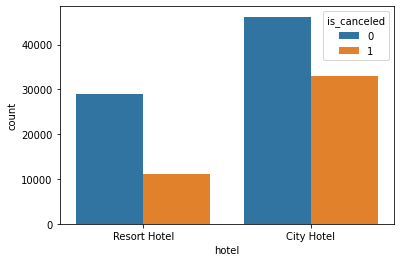

In [0]:
# ¿Qué tipo de hotel tiene el mayor número de cancelaciones?
sns.countplot(data=df, x = 'hotel', hue='is_canceled')
pyplot.show()

In [0]:
#¿Cuales son los paises más visitados?
paises_mas_visitas = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
paises_mas_visitas.columns = ['country', 'No of guests']
paises_mas_visitas

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,NPL,1
161,AIA,1
162,DMA,1
163,BHR,1


In [0]:
#Mapa para visualizar los paises anteriores y la cantidad de visitantes.
basemap = folium.Map()
guests_map = px.choropleth(paises_mas_visitas, locations = paises_mas_visitas['country'],color_continuous_scale="portland",
                           color = paises_mas_visitas['No of guests'], hover_name = paises_mas_visitas['country'])
guests_map.show()

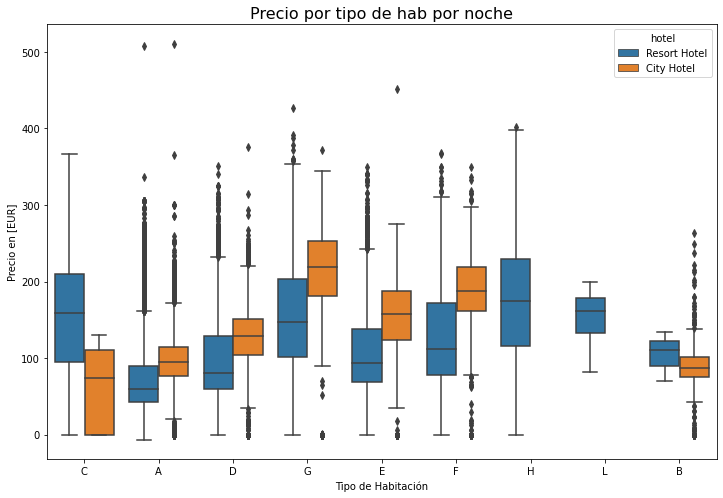

In [0]:
# ¿Cuánto se paga por una noche de alojamiento?
# Filtrar las reservas no canceladas
cuanto_se_paga = df[df['is_canceled'] == 0] 
pyplot.figure(figsize=(12,8))
# Vamos a usar para este fin la variable 'adr', dividiendo por tipo de habitación y los dos tipos de hoteles (Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights)
sns.boxplot(x='reserved_room_type',y='adr',data=cuanto_se_paga,hue='hotel') # adr stands for prize of the room  
pyplot.title('Precio por tipo de hab por noche', fontsize=16)
pyplot.xlabel('Tipo de Habitación')
pyplot.ylabel('Precio en [EUR]' )
pyplot.show()

Out[35]: Text(0.5, 1.0, 'Año de llegada, Anticipo y Cancelaciones')

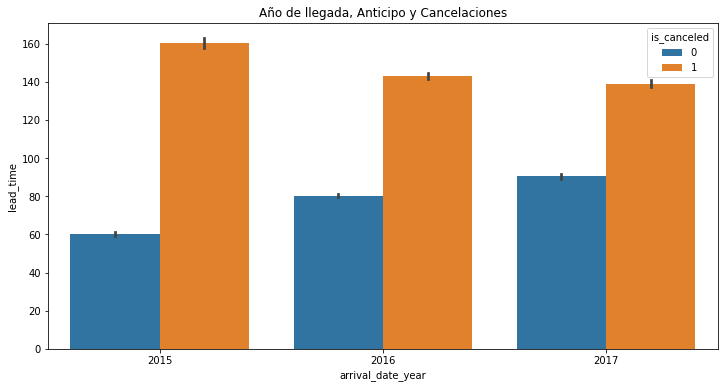

In [0]:
# ¿Existe alguna relación entre el número de días transcurridos desde la reserva, y las cancelaciones?
# lead_time: num días transcurridos entre la fecha de reserva y el dia de llegada. ANTICIPACIÓN DE LA RESERVA.
pyplot.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= df)
pyplot.title('Año de llegada, Anticipo y Cancelaciones')

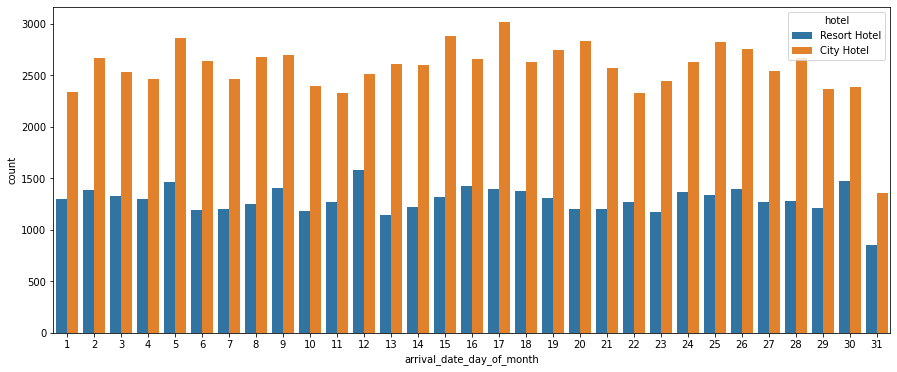

In [0]:
# ¿Se distribuyen de forma homogénea las llegadas dependiendo del mes?
pyplot.figure(figsize=(15,6))
sns.countplot(data = df, x = 'arrival_date_day_of_month', hue='hotel')
pyplot.show()

Se concluye que se distribuyen de forma razonablemente homogenea. El valor más bajo se registra los días 31, esto se debe a que no todos los meses tienen 31 días y por tanto el recuento de llegadas es inferior.

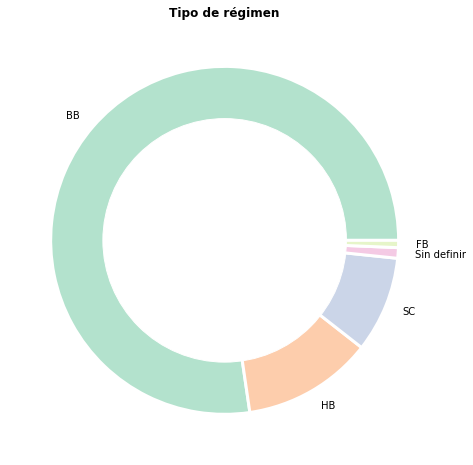

In [0]:
#  ¿Qué tipo de régimen de pensión eligen los huéspedes?
# BB: BED AND BREAKFAST
# HB: Half board
# SC: No meal
# FB: FULL BOARD (PENSIÓN COMPLETA)
meal_labels= ['BB','HB', 'SC', 'Sin definir', 'FB']
size = df['meal'].value_counts()
pyplot.figure(figsize=(8,8))
cmap =pyplot.get_cmap("Pastel2")
colors = cmap(np.arange(6)*1)
my_circle=pyplot.Circle( (0,0), 0.7, color='white')
pyplot.pie(size, labels=meal_labels, colors=colors, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
p=pyplot.gcf()
p.gca().add_artist(my_circle)
pyplot.title('Tipo de régimen', weight='bold')
pyplot.show()

La mayoria de las reservas son con régimen de Bed & Breakfast y sólo una parte muy pequeña elije pensión completa.  Como podemos observar en el gráfico de abajo, la gran mayoría de reservas son con régimen de Bed & Breakfast. Casi nadie elige Full Board

Si puede analizar el comportamiento de un país en específico, utilicemos España como ejemplo:

In [0]:
# Cantidad de reservas en España
reservation_date_Spain = df[df['country'] == "ESP"][df['is_canceled'] == 0]['arrival_date_year'].value_counts().reset_index()
reservation_date_Spain.columns = ['Año', 'Nº Reservas']
reservation_date_Spain

<command-2342061653398251>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Año,Nº Reservas
0,2016,2850
1,2015,1800
2,2017,1741


Out[39]: <AxesSubplot:xlabel='Año', ylabel='Nº Reservas'>

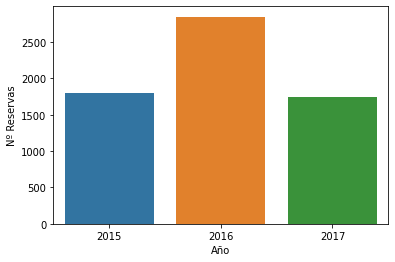

In [0]:
# Se visualizan los resultados
sns.barplot(x = "Año", y= "Nº Reservas", data = reservation_date_Spain)

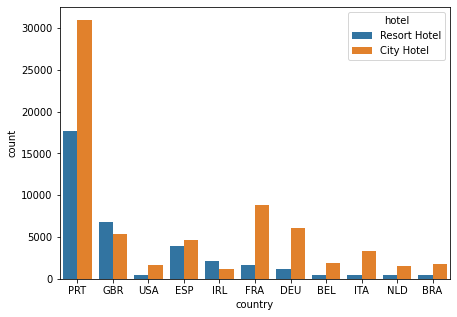

In [0]:
# ¿Cuál es el país con más hoteles y de cual tipo?
counts = df['country'].value_counts()
pyplot.subplots(figsize=(7,5))
sns.countplot(x='country', hue='hotel',  data=df[df['country'].isin(counts[counts > 2000].index)])
pyplot.show()

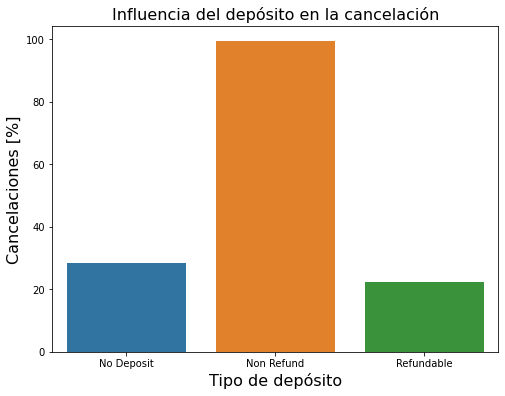

In [0]:
# Analice la relación entre la variable “Deposit type” y las cancelaciones
# group data for deposit_type:
deposit_cancel_data = df.groupby("deposit_type")["is_canceled"].describe()

#show figure:
pyplot.figure(figsize=(8, 6))
sns.barplot(x=deposit_cancel_data.index, y=deposit_cancel_data["mean"] * 100)
pyplot.title("Influencia del depósito en la cancelación", fontsize=16)
pyplot.xlabel("Tipo de depósito", fontsize=16)
pyplot.ylabel("Cancelaciones [%]", fontsize=16)
pyplot.show()

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
   <strong>AHORA TÚ: </strong>  
  <p>
Si quisieramos saber si se tienen un mayor índice de cancelación los fines de semana o entre semana. ¿Qué tipo de análisis sería necesario hacer? ¿Qué graficos nos ayudaría a mostrar esos datos?
</p>
</div>

In [0]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar


Haga doble clic <b>aquí</b> para ver la solución.

<!-- Respuesta:

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'stays_in_weekend_nights', hue='is_canceled')
plt.title('Número de noches en fin de semana', size=11)
plt.subplots_adjust(right=2)
plt.show()

Como podemos observar, la mayoría de las reservas para fin de semana no se han cancelado.

-->

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
   <strong>AHORA TÚ: </strong>  
  <p>
Visualice la cantidad de reservas ordenadas por país en un gráfico de barras
</p>
</div>

In [0]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar


Haga doble clic <b>aquí</b> para ver la solución.

<!-- Respuesta:

fig = plt.figure(figsize=(12,4), dpi=150)


country_wise_guests = df[(df['is_canceled'] == 0)]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']

country_wise_guests = country_wise_guests[country_wise_guests['No of guests'] > 60]

sns.barplot(data=country_wise_guests, x = 'country', y = 'No of guests')
plt.xticks(rotation=90,fontsize=11);

-->

De este Análisis Exploratorio de los datos se puede concluir lo siguiente:

La indudable importancia de la variable hotel, referida al tipo de hotel que se está reservando, pues como hemos podido ver en varios gráficos, la diferencia en la interpretación es considerable cuando hablamos de un resort frente a cuando hablamos de un hotel de ciudad.
Por otro lado, las peculiaridades en ciertas variables como “lead_time”, “Booking_changes” y “previous_cancellations”, las cuales se considera que pueden tener un peso considerable para predecir de una manera más precisa futuras cancelaciones.

## Limpieza de datos

### Resolver problema de datos faltantes

El problema de los datos faltantes en este conjunto no es tan complicado. Observemos cuáles variables tienen datos faltantes y qué se puede hacer en cada caso:

In [0]:
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [0]:
df[["children","country","agent","company"]].describe(include="all")

,children,country,agent,company
count,119386.000000,118902,103050.000000,6797.000000
unique,NaN,177,NaN,NaN
top,NaN,PRT,NaN,NaN
freq,NaN,48590,NaN,NaN
mean,0.103890,NaN,86.693382,189.266735
std,0.398561,NaN,110.774548,131.655015
min,0.000000,NaN,1.000000,6.000000
25%,0.000000,NaN,9.000000,62.000000
50%,0.000000,NaN,14.000000,179.000000
75%,0.000000,NaN,229.000000,270.000000


La cantidad de datos faltantes en la columna <b>company</b> hace que no sea útil sustituirlos o imputarlos, pues faltan muchos datos y modificarlos supondría una grave alteración de los datos.

La columna <b>agent</b> no está en la misma situación pero no aporta gran valor pues solo es el identificador de los agentes, no el nombre en si.

Por tanto se procede a eliminar esas variables:

In [0]:
df = df.drop(['company', 'agent'], axis=1)

Para trabajar las columnas <b>country</b> y <b>children</b> una alternativa es eliminar los registros que tienen NA:

In [0]:
df1 = df.dropna(subset=['country', 'children'], axis=0)

In [0]:
print(df1.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Otra alternativa es sustituir la variable con un valor.

Para la columna <b>country</b> que es categórica sería sustituir con la Moda.

Para la variable <b>children</b> que es numérica sería necesario analizar su simetría y luego sustituir con media o mediana:

In [0]:
# El país más común es PRT
df["country"].replace(np.nan, "PRT", inplace=True)

Out[50]: <seaborn.axisgrid.FacetGrid at 0x7fe30de55df0>

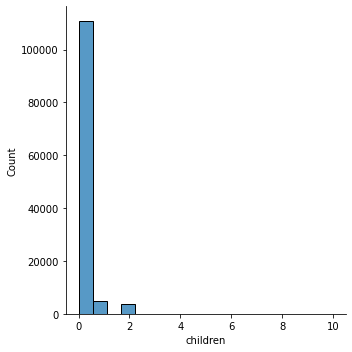

In [0]:
sns.displot(df["children"])

In [0]:
mean = df['children'].mean()
median = df['children'].median()
mode = df['children'].mode()
skew = df['children'].skew()
kurt = df['children'].kurt()
print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 0.10388990333874994
La mediana es: 0.0
La moda es: 0    0.0
dtype: float64
El sesgo es: 4.11258954232252
La kurtosis es: 18.673692362954903


In [0]:
df["children"].replace(np.nan, 0, inplace=True)

In [0]:
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Tipos de datos

Una vez resuelto el problema de los datos faltantes para la columna <b>children</b> se cambia el tipo de datos de la columna a Int y para la columna <b>reservation_status_date</b> cambiarla a DateTime:

In [0]:
df[["children"]] = df[["children"]].astype("int")

In [0]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [0]:
df.dtypes

Out[56]: hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_ro

### Datos inconsistentes

Al analizar las características de las reservas, en concreto en lo que se refiere a los huéspedes, se puede observar que existen registros que cumplen con la condición de que: (dataframe.children == 0) & (dataframe.adults == 0) & (dataframe.babies == 0)

No puede haber 0's en una misma observación en adults, children y babies (pues no se puede hacer una reserva sin huéspedes).

Estos registros se deben eliminar:

In [0]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
sum(filter)

Out[57]: 180

Se concluye que se trata de un error, por lo que se procede a eliminarlos:

In [0]:
df = df[~filter]
df.shape

Out[58]: (119210, 30)

Comprobación de que no hay registros que sumen cero y por tanto el número de registros total es correcto:

In [0]:
# TOTAL DE HUÉSPEDES

df['Total_Guests'] = df['adults'] + df['children']

# No hay ningún registro que sume 0

filter = df.Total_Guests != 0
df.drop("Total_Guests", axis=1, inplace=True) # Elimino la columna porque solo era para probar
sum(filter) # el número de registros total son 119210, asi que es correcto

Out[59]: 119210

### Datos atípicos

Se comienza con la detección de outliers visualizando los boxplot de las diferentes variables que conforman nuestro conjunto. De su visualización se obtiene un total de 8 variables que presentan cierta problemática: 'lead time', 'stays in weekend nights', 'stays in week nights', 'adults', 'babies', 'required car parking spaces', 'adr', 'previous cancellations'.

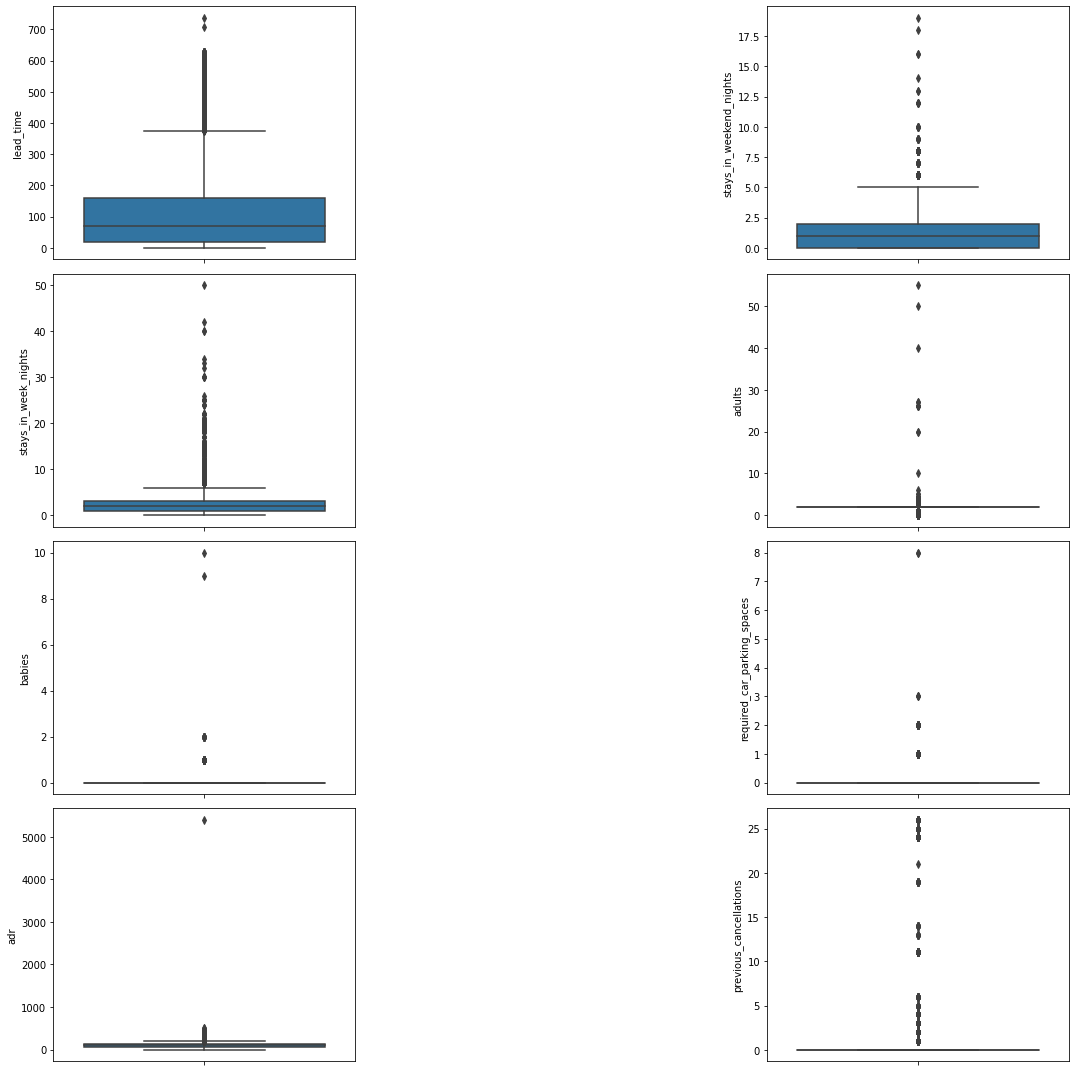

In [0]:
columnas = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 
           'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations']
n = 1
pyplot.figure(figsize=(20,15))

for column in columnas:
  pyplot.subplot(4,4,n)
  n = n+2
  sns.boxplot(y=df[column])
  pyplot.tight_layout()

Se procede a sustituir la mayoría de los valores atípicos por otros dentro del último cuartil o por el valor cero dependiendo del caso.

In [0]:
df.loc[df.lead_time > 400, 'lead_time'] = 400
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.stays_in_week_nights > 20, 'stays_in_week_nights'] = 20
df.loc[df.adults > 10, 'adults'] = 10
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000
df.loc[df.adr < 30, 'adr'] = 0

<p>Cuando se quiere analizar todas las variables para saber si hay registros atípicos e inconsistentes entre ellas, se puede utilizar el algoritmo de LOF.</p>
<p>Para el ejemplo se utiliza una selección de las variables numéricas</p>

In [0]:
#Seleccionar columnas
select_df = df[['lead_time','arrival_date_year','stays_in_weekend_nights', 'adults','is_repeated_guest','previous_cancellations','required_car_parking_spaces', 'adr']]

#Especificar el modelo que se va a utilizar
model = LocalOutlierFactor(n_neighbors = 30)

#Ajuste al modelo
y_pred = model.fit_predict(select_df)
y_pred

Out[62]: array([ 1, -1,  1, ...,  1,  1,  1])

In [0]:
#Filtrar los indices de los outliers
outlier_index = (y_pred == -1) #los valores negativos son outliers

#Filtrar los valores de los outliers en el dataframe
outlier_values = select_df.iloc[outlier_index]
outlier_values

,lead_time,arrival_date_year,stays_in_weekend_nights,adults,is_repeated_guest,previous_cancellations,required_car_parking_spaces,adr
1,400,2015,0,2,0,0,0,0.00
14,37,2015,0,2,0,0,0,94.71
21,72,2015,2,2,0,0,0,84.67
22,72,2015,2,2,0,0,0,84.67
30,118,2015,4,1,0,0,0,62.00
...,...,...,...,...,...,...,...,...
119317,188,2017,0,3,0,0,0,129.60
119321,181,2017,0,2,0,0,0,119.25
119359,63,2017,1,2,0,0,0,133.50
119366,210,2017,2,2,0,0,0,85.59


### Datos redundantes

Para identificar los atributos redundantes se puede utilizar la matriz de correlación e indentificar correlaciones entre atributos. La matriz de correlación solo se calcula sobre atributos numéricos:

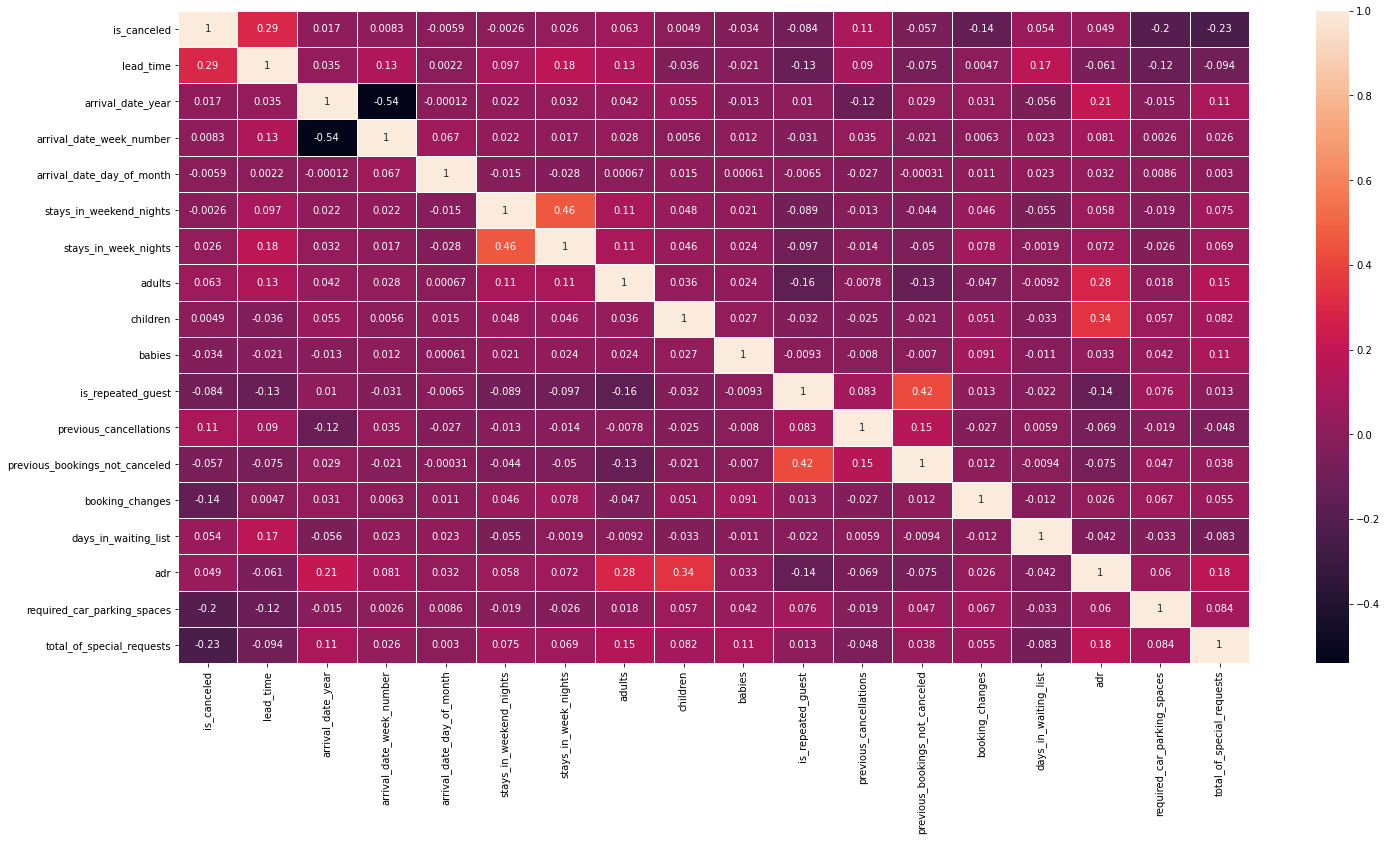

In [0]:
pyplot.figure(figsize = (24, 12))
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
pyplot.show()

### Datos duplicados

El análisis de datos duplicados en este conjunto es interesante. Existen muchas filas duplicadas, sin embargo en algunos casos pudieran ser coincidencias de reservas iguales, para clientes diferentes. En este caso es mejor indagar un poco en el negocio para saber cuál es realmente la posibilidad de reservas idénticas. Como último recurso, si se eliminan todos los duplicados, igual quedan suficientes datos para realizar un análisis interesante:

In [0]:
#Contando los duplicados de todo el dataframe
df.duplicated().sum()

Out[65]: 32033

In [0]:
# Permite ver las filas duplicadas de todo el dataframe
df.loc[df.duplicated(), :]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,E,0,No Deposit,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,D,0,No Deposit,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,A,0,No Deposit,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,D,0,No Deposit,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [0]:
# Si se quisiera eliminar los duplicados
df_drop = df.drop_duplicates()
df_drop.shape

Out[67]: (87177, 30)

## Transformaciones a los datos

Las transformaciones que se van a aplicar a continuación dependen de la técnica analítica a aplicar. No siempre es necesario aplicarlas todas. En este notebook se aplicarán todas a manera de ejemplo. Es importante tener claras las necesidades de cada técnica para aplicar lo más adecuado:

### Normalización
La normalización o escalamiento es necesaria para poner todas las variables numéricas en la misma escala. Las técnicas basadas en distancias siempre necesitan Normalización. A continuación se normalizan las variales numéricas:

In [0]:
df_normalize = df.copy()

In [0]:
scaler = MinMaxScaler()
df_normalize[['lead_time','arrival_date_year','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adr']] = scaler.fit_transform(
    df_normalize[['lead_time','arrival_date_year','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adr']])
df_normalize[['lead_time','arrival_date_year','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adr']].tail(10)

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adr
119380,0.1100,1.0,1.000000,0.2,0.15,0.14075
119381,0.4700,1.0,1.000000,0.4,0.15,0.09900
119382,0.3375,1.0,0.966667,0.4,0.20,0.20900
119383,0.4100,1.0,1.000000,0.4,0.20,0.08760
119384,0.0525,1.0,0.966667,0.4,0.25,0.09614
119385,0.0575,1.0,0.966667,0.4,0.25,0.09614
119386,0.2550,1.0,1.000000,0.4,0.25,0.22543
119387,0.0850,1.0,1.000000,0.4,0.25,0.15771
119388,0.2725,1.0,1.000000,0.4,0.25,0.10440
119389,0.5125,1.0,0.933333,0.4,0.35,0.15120


### Discretización

Para realizar un ejemplo de discretización se utiliza la variable <b>lead_time</b> que significa los días de antelación con la que se realiza una reserva. Primero se visualiza la distribución de la variable:

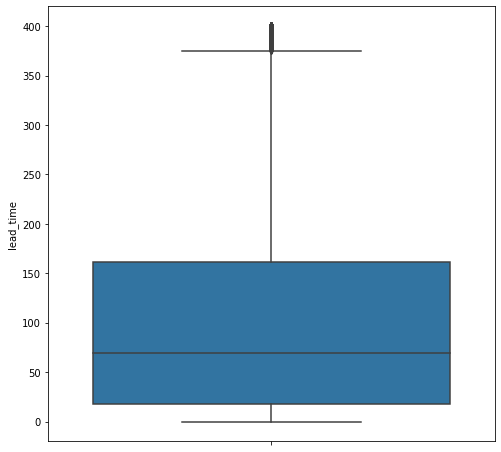

In [0]:
fig = pyplot.figure(figsize=(8,8))
sns.boxplot(y=df["lead_time"])
pyplot.show()

A continuación se diseñan los grupos (bins) por los cuales se desea discretizar la variable y se realiza la discretización:

In [0]:
nivelAntelacion = ['Ninguno', '2-3Semanas', '1Mes','2Meses','3Meses','Mas3Meses']

In [0]:
df['lead_time_binned']=pd.cut(x = df['lead_time'],
                        bins = [0,1,21,30,60,120,737], 
                        labels = nivelAntelacion, include_lowest=True)
df[['lead_time','lead_time_binned']].head(10)

,lead_time,lead_time_binned
0,342,Mas3Meses
1,400,Mas3Meses
2,7,2-3Semanas
3,13,2-3Semanas
4,14,2-3Semanas
5,14,2-3Semanas
6,0,Ninguno
7,9,2-3Semanas
8,85,3Meses
9,75,3Meses


Una vez discretizada la variable se visualizan los resultados, se puede observar que la mayor proporsión de ejemplos permanecen en la categorías de Mas3Meses. Tambien se analiza cómo se comportan las cancelaciones con respecto a la nueva variable:

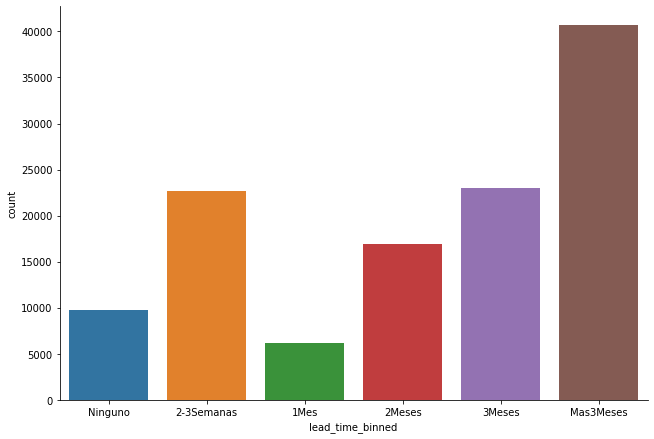

In [0]:
sns.catplot(x="lead_time_binned", kind="count", data=df, height = 6, aspect = 1.5)
pyplot.show()

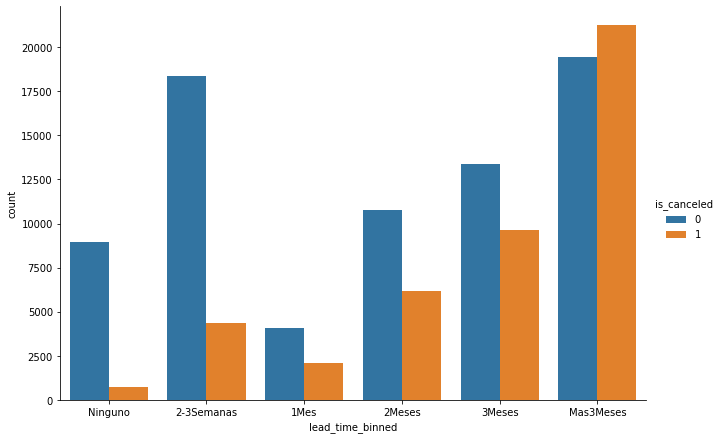

In [0]:
sns.catplot(x="lead_time_binned", hue ='is_canceled' ,kind="count", data=df, height = 6, aspect = 1.5)
pyplot.show()

### Numerización

El objetivo de numerizar es convertir a número distintas variables que son categóricas, esto puede ser necesario para ciertas técnicas que solo funcionan con datos numéricos. A continuación se muestra cómo numerizar distintas variables del conjunto de datos según su tipo y valor:

Las siguientes variables se pueden numerizar 1 a 1, esto significa que se puede sustituir los valores por números:

In [0]:
# Numerizar 1 a 1
df_cat['hotel'] = df_cat['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
df_cat['reserved_room_type'] = df_cat['reserved_room_type'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6,'H': 7, 'L': 8})
df_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,0,July,BB,PRT,Direct,Direct,2.0,C,No Deposit,Transient,Check-Out,2015-07-01
1,0,July,BB,PRT,Direct,Direct,2.0,C,No Deposit,Transient,Check-Out,2015-07-01
2,0,July,BB,GBR,Direct,Direct,0.0,C,No Deposit,Transient,Check-Out,2015-07-02
3,0,July,BB,GBR,Corporate,Corporate,0.0,A,No Deposit,Transient,Check-Out,2015-07-02
4,0,July,BB,GBR,Online TA,TA/TO,0.0,A,No Deposit,Transient,Check-Out,2015-07-03


Observe y analice los valores de la variable <b>meal</b>:
*   SC: No meal
*   BB: BED AND BREAKFAST
*   HB: Half board
*   FB: FULL BOARD (PENSIÓN COMPLETA)
*   Undefined: No definido el régimen de comida

Si no estuviera la categoría de Undefined, se pusiera numerizar 1 a 1, pero al existir, no es posible. Se puedieran eliminar esos registros o tratarlos como datos faltantes, si son pocos.

Observe y analice la variable <b>market_segment</b>:
*   Direct
*   Corporate
*   Online Travel Agents
*   Offline Travel Agents/Tours Operators
*   Complementary
*   Groups
*   Undefined
*   Aviontion

<p>¿Pueden determinar un orden natural en los datos? No se puede. Numerizar de esta forma sería un error:</p>
`cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})`

Para las siguientes variables no se puede realizar el mismo proceso, pues son variables Nominales, no tienen un orden natural, y numerizarlas 1 a 1 sería introducir un error grave en los datos y en las salidas de cualquier algoritmo. Hay que numerizar de 1 a N, creando variable dummies:

In [0]:
df_cat = pd.get_dummies(df_cat, columns = ["distribution_channel"])
df_cat = pd.get_dummies(df_cat, columns = ["customer_type"])
df_cat = pd.get_dummies(df_cat, columns = ["deposit_type"])
df_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,reserved_room_type,assigned_room_type,reservation_status,reservation_status_date,distribution_channel_Corporate,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,July,BB,PRT,Direct,2.0,C,Check-Out,2015-07-01,0,...,0,0,0,0,0,1,0,1,0,0
1,0,July,BB,PRT,Direct,2.0,C,Check-Out,2015-07-01,0,...,0,0,0,0,0,1,0,1,0,0
2,0,July,BB,GBR,Direct,0.0,C,Check-Out,2015-07-02,0,...,0,0,0,0,0,1,0,1,0,0
3,0,July,BB,GBR,Corporate,0.0,A,Check-Out,2015-07-02,1,...,0,0,0,0,0,1,0,1,0,0
4,0,July,BB,GBR,Online TA,0.0,A,Check-Out,2015-07-03,0,...,0,1,0,0,0,1,0,1,0,0


### Técnicas de muestreo

Si el objetivo fuera predecir la variable <b>is_canceled</b> se debería analizar el balance de cada una de las clases, a continuación se muestran en un gráficos:

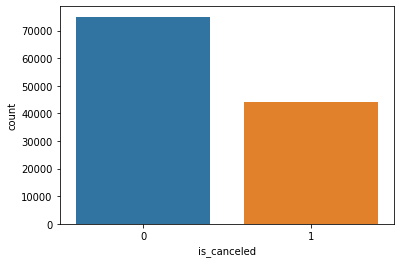

In [0]:
# Variable si la reserva fue cancelada o no
sns.countplot(data=df, x = 'is_canceled')
pyplot.show()

Es evidente que hay más datos de una que de la otra, pudiera aplicarse una técnicas de submuestreo para balancear las clases:

In [0]:
# Contar las clases
count_class_No, count_class_Yes = df["is_canceled"].value_counts()
# Dividir los dataframes por las clases
df_class_No = df[df["is_canceled"] == 0]
df_class_Yes = df[df["is_canceled"] == 1]
# submuestrear la clase mayoritaria No
no_downsampled = resample(df_class_No,
                          replace=False, # sample without replacement
                          n_samples=count_class_Yes, # Number of samples to generate.
                          random_state=27) # reproducible results
                          # combinar dataframes
df_sample = pd.concat([df_class_Yes, no_downsampled])

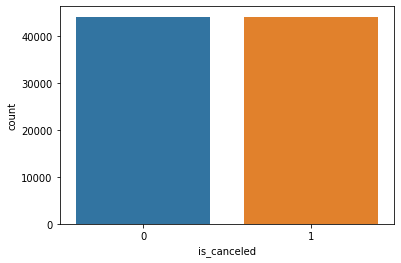

In [0]:
sns.countplot(data=df_sample, x = 'is_canceled')
pyplot.show()